# Importes

In [ ]:
import random
import pickle
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, roc_auc_score, auc

In [ ]:
np.random.seed(42)

random.seed(42)

torch.manual_seed(42)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [ ]:
ruta_archivo = './model/breast_cancer.parquet';

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Visualización

In [ ]:
df = pd.read_parquet(ruta_archivo)

In [ ]:
df.head()

,Diagnóstico,Radio medio,Textura media,Perímetro medio,Área media,Suavidad media,Compacidad media,Concavidad media,Puntos cóncavos medios,Simetría media,...,Peor radio,Peor textura,Peor perímetro,Peor área,Peor suavidad,Peor compacidad,Peor concavidad,Peor puntuación de los puntos cóncavos,Peor simetría,Peor dimensión fractal
0,Maligno,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,Maligno,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,Maligno,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,Maligno,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,Maligno,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Diagnóstico                             569 non-null    object 
 1   Radio medio                             569 non-null    float64
 2   Textura media                           569 non-null    float64
 3   Perímetro medio                         569 non-null    float64
 4   Área media                              569 non-null    float64
 5   Suavidad media                          569 non-null    float64
 6   Compacidad media                        569 non-null    float64
 7   Concavidad media                        569 non-null    float64
 8   Puntos cóncavos medios                  569 non-null    float64
 9   Simetría media                          569 non-null    float64
 10  Dimensión fractal media                 569 non-null    float6

In [ ]:
mapa = {'Maligno':1, 'Benigno':0}
df['Diagnóstico']  = df['Diagnóstico'].map(mapa)

In [ ]:
df.head()

,Diagnóstico,Radio medio,Textura media,Perímetro medio,Área media,Suavidad media,Compacidad media,Concavidad media,Puntos cóncavos medios,Simetría media,...,Peor radio,Peor textura,Peor perímetro,Peor área,Peor suavidad,Peor compacidad,Peor concavidad,Peor puntuación de los puntos cóncavos,Peor simetría,Peor dimensión fractal
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Distribución de las variables

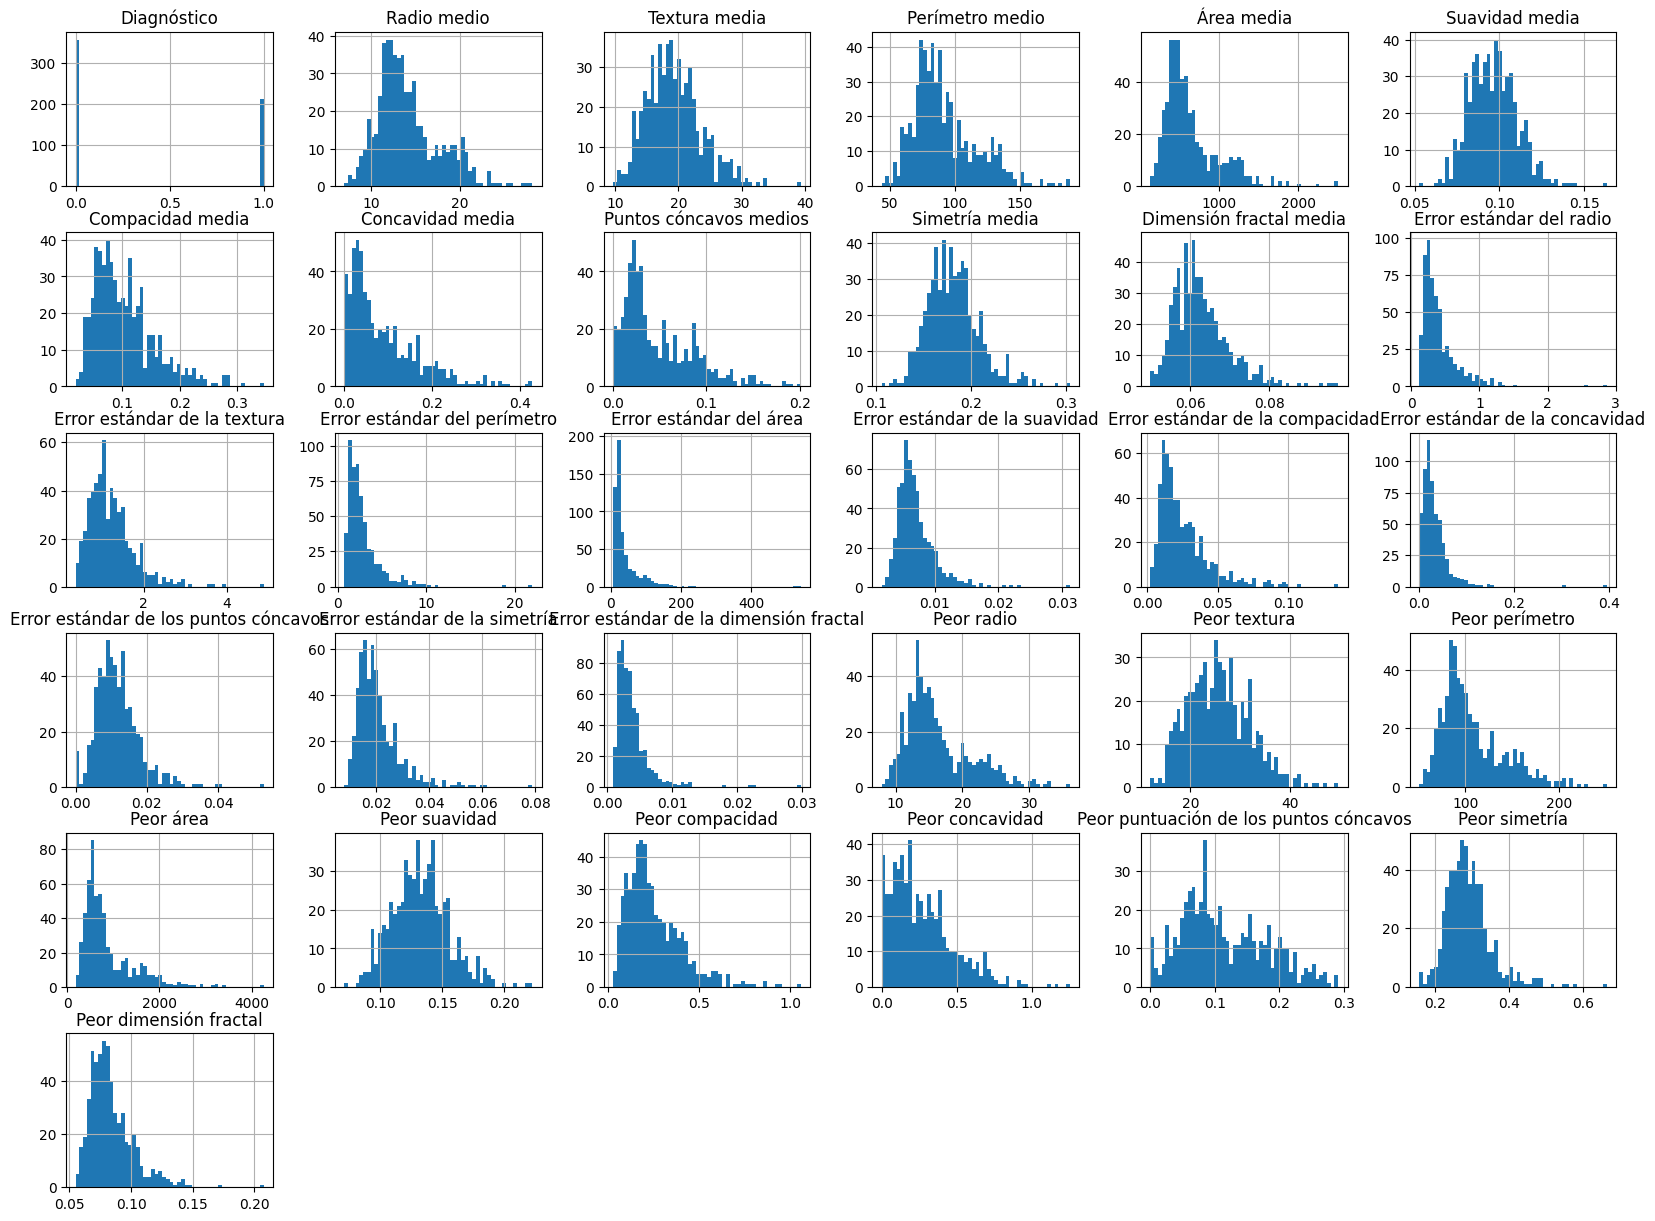

In [ ]:
df.hist(bins=50, figsize=(20,15));
plt.show();

## Estudio de Correlaciones

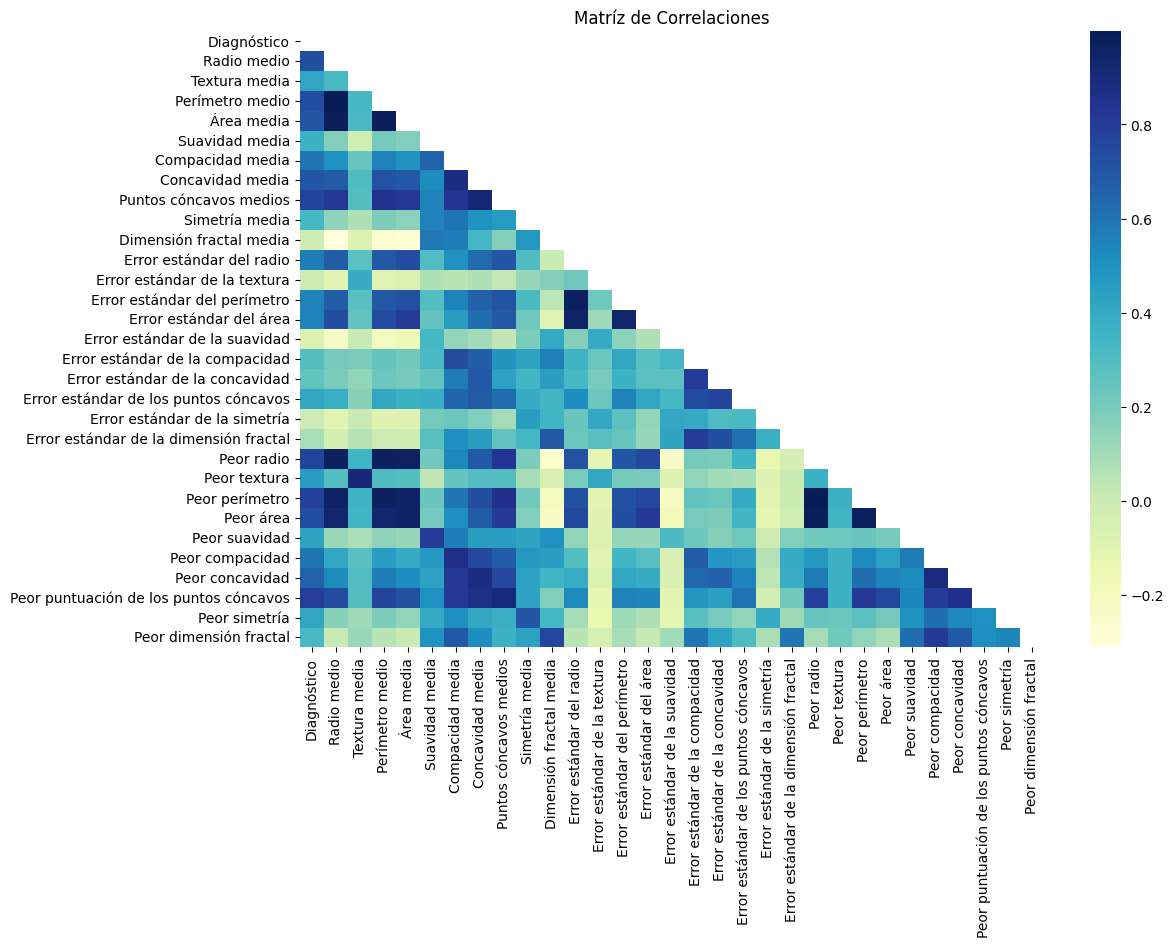

In [ ]:
correlation_matrix = df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='YlGnBu', fmt='.2f', mask=mask)
plt.title('Matríz de Correlaciones')
plt.show()

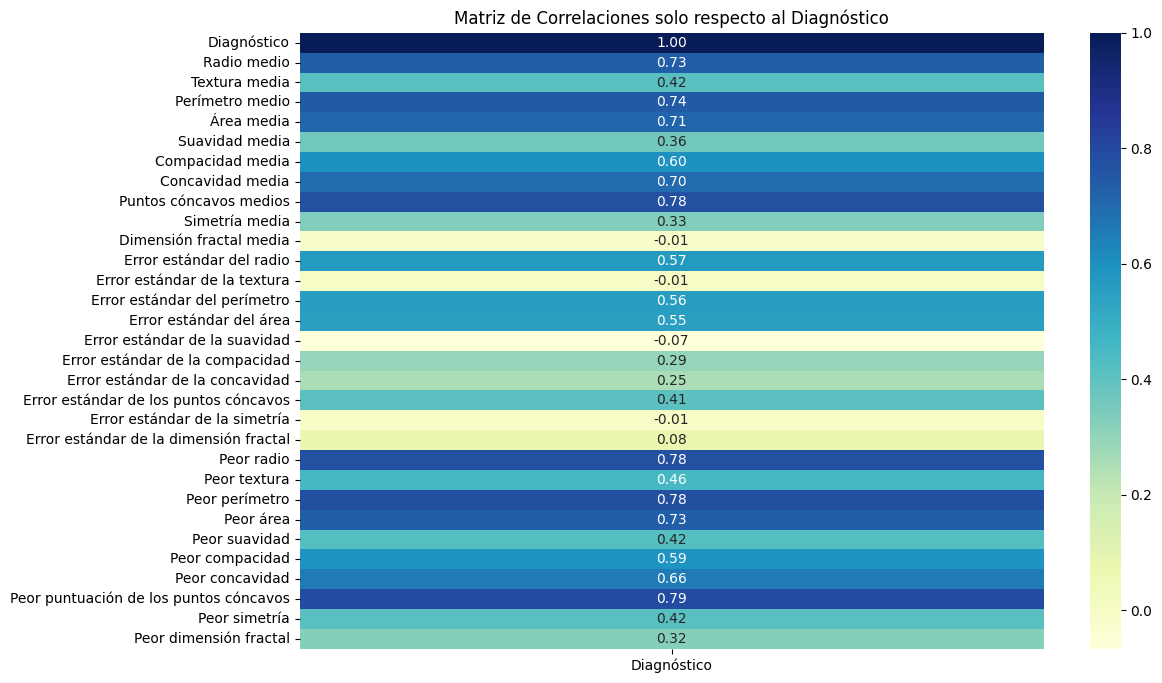

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix[['Diagnóstico']], annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Matriz de Correlaciones solo respecto al Diagnóstico')
plt.show()

# Split

In [ ]:
np.random.seed(42)

In [ ]:
X = df.drop(columns='Diagnóstico')
y = df['Diagnóstico']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Modelos

## Funciones

In [ ]:
def conf_matrix(y_true, y_pred):
  cm = confusion_matrix(y_true=y_true, y_pred=y_pred)

  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title('Confusion Matrix - Random Forest')
  plt.show()

def roc(y_true, y_pred):
  fpr, tpr, thresholds = roc_curve(y_true, y_pred)
  roc_auc = auc(fpr, tpr)

  plt.figure(figsize=(8, 6))
  plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
  plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
  plt.legend(loc='lower right')
  plt.show()

## RandomForest

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Classifier:")
print(f"Precisión: {accuracy_score(y_test, y_pred_rf):.2f}")
print(classification_report(y_test, y_pred_rf))

Random Forest Classifier:
Precisión: 0.96
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       107
           1       1.00      0.91      0.95        64

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.97      0.96      0.96       171



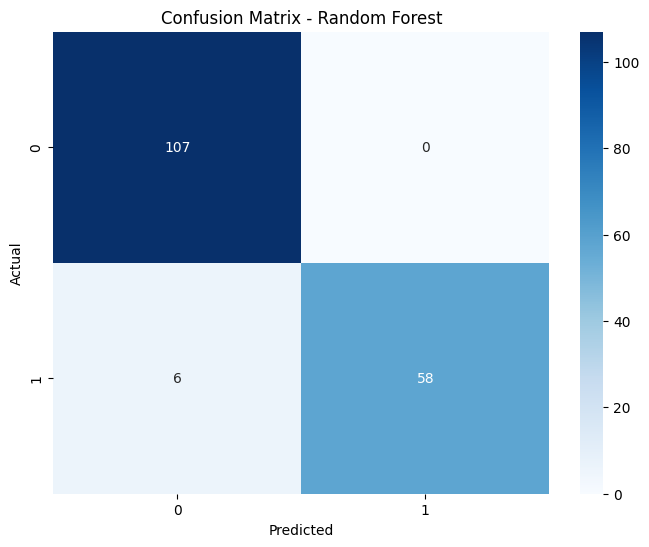

In [ ]:
conf_matrix(y_test, y_pred_rf)

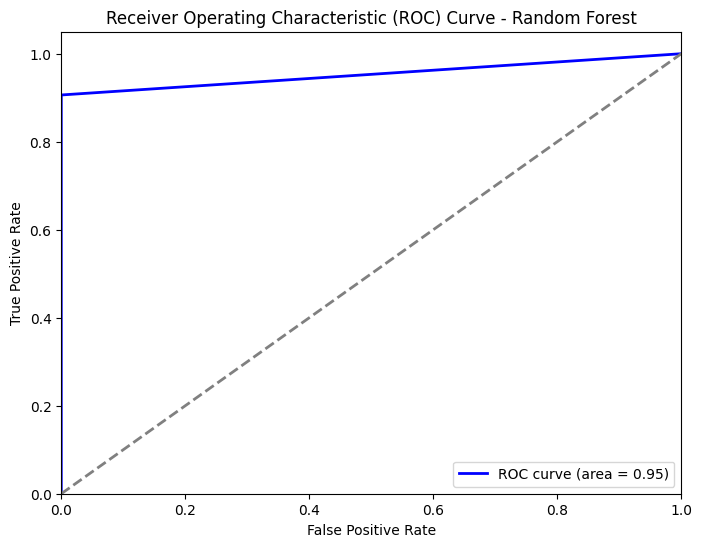

In [ ]:
roc(y_test, y_pred_rf)

In [ ]:
with open('model_rf.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

### Búsqueda de hiperparámetros

In [ ]:
rf_model2 = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf_model2, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X, y)

print("Mejores hiperparámetros:", grid_search.best_params_)

print("Puntuación del mejor modelo:", grid_search.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Mejores hiperparámetros: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Puntuación del mejor modelo: 0.971883247942866


In [ ]:
best_params = grid_search.best_params_
best_params

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 200}

In [ ]:
rf_model3 = RandomForestClassifier(**best_params, random_state=42)
rf_model3.fit(X_train, y_train)
y_pred_rf3 = rf_model3.predict(X_test)

print("Random Forest Classifier:")
print(f"Precisión: {accuracy_score(y_test, y_pred_rf3):.2f}")
print(classification_report(y_test, y_pred_rf3))

Random Forest Classifier:
Precisión: 0.96
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       107
           1       1.00      0.91      0.95        64

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.97      0.96      0.96       171



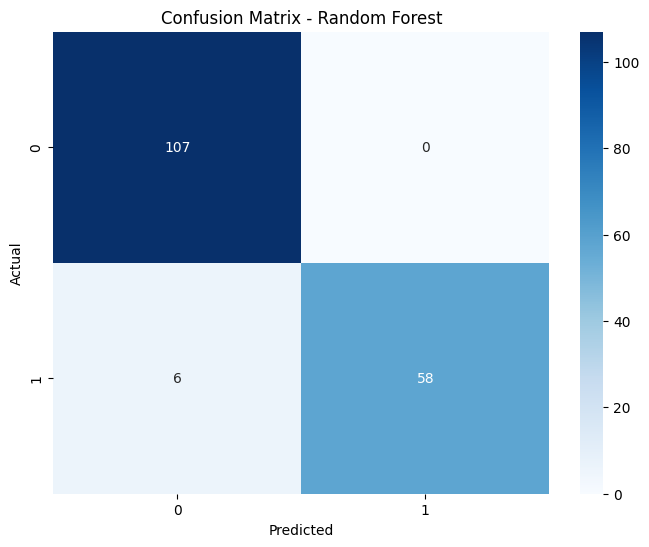

In [ ]:
conf_matrix(y_test, y_pred_rf3)

## Red Neuronal

In [ ]:
train, test = train_test_split(df, test_size=0.3, random_state=42, shuffle=True)

In [ ]:
X_train = torch.tensor(train.drop(columns=['Diagnóstico']).values, dtype=torch.float)
y_train = torch.tensor(train[['Diagnóstico']].values, dtype=torch.float)

X_test = torch.tensor(test.drop(columns=['Diagnóstico']).values, dtype=torch.float)
y_test = test[['Diagnóstico']].values

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(30, 20)
        self.fc2 = nn.Linear(20, 10)
        self.fc3 = nn.Linear(10, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x

In [ ]:
model_nn = NeuralNetwork()

criterion = nn.BCELoss()
optimizer = optim.RMSprop(model_nn.parameters(), lr=0.001)

# Entrenamiento del modelo
epochs = 3000
model_nn.train()
for epoch in range(epochs):
    outputs = model_nn(X_train)
    loss = criterion(outputs, y_train)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Imprimir el progreso del entrenamiento
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [100/3000], Loss: 0.3220
Epoch [200/3000], Loss: 0.2535
Epoch [300/3000], Loss: 0.2319
Epoch [400/3000], Loss: 0.3003
Epoch [500/3000], Loss: 0.2151
Epoch [600/3000], Loss: 0.2074
Epoch [700/3000], Loss: 0.2039
Epoch [800/3000], Loss: 0.2020
Epoch [900/3000], Loss: 0.1893
Epoch [1000/3000], Loss: 0.1842
Epoch [1100/3000], Loss: 0.1792
Epoch [1200/3000], Loss: 0.1743
Epoch [1300/3000], Loss: 0.1694
Epoch [1400/3000], Loss: 0.1646
Epoch [1500/3000], Loss: 0.1601
Epoch [1600/3000], Loss: 0.1619
Epoch [1700/3000], Loss: 0.1503
Epoch [1800/3000], Loss: 0.1469
Epoch [1900/3000], Loss: 0.1419
Epoch [2000/3000], Loss: 0.1377
Epoch [2100/3000], Loss: 0.1345
Epoch [2200/3000], Loss: 0.5809
Epoch [2300/3000], Loss: 0.1325
Epoch [2400/3000], Loss: 0.1294
Epoch [2500/3000], Loss: 0.1266
Epoch [2600/3000], Loss: 0.1241
Epoch [2700/3000], Loss: 0.1218
Epoch [2800/3000], Loss: 0.1197
Epoch [2900/3000], Loss: 0.1169
Epoch [3000/3000], Loss: 0.1133


In [ ]:
model_nn.eval()
y_pred_nn = model_nn(X_test)
y_pred_nn = y_pred_nn.detach().numpy().round()

print("Red Neuronal:")
print(f"Precisión: {accuracy_score(y_test, y_pred_nn):.2f}")
print(classification_report(y_test, y_pred_nn))

Red Neuronal:
Precisión: 0.98
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       108
           1       0.97      0.97      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



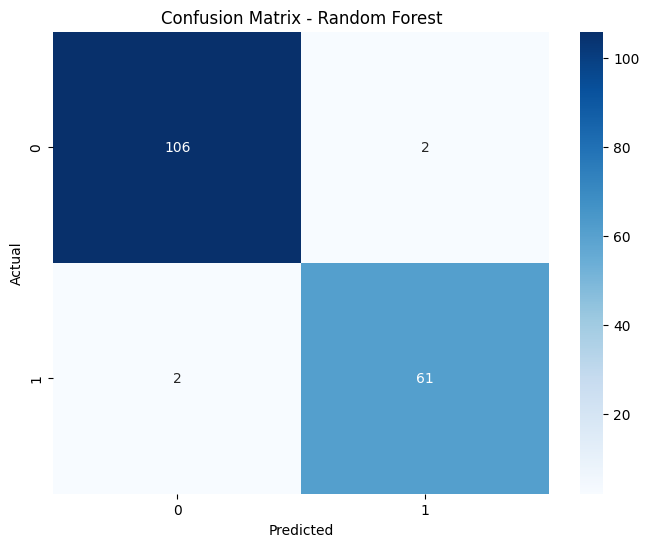

In [ ]:
conf_matrix(y_test, y_pred_nn)

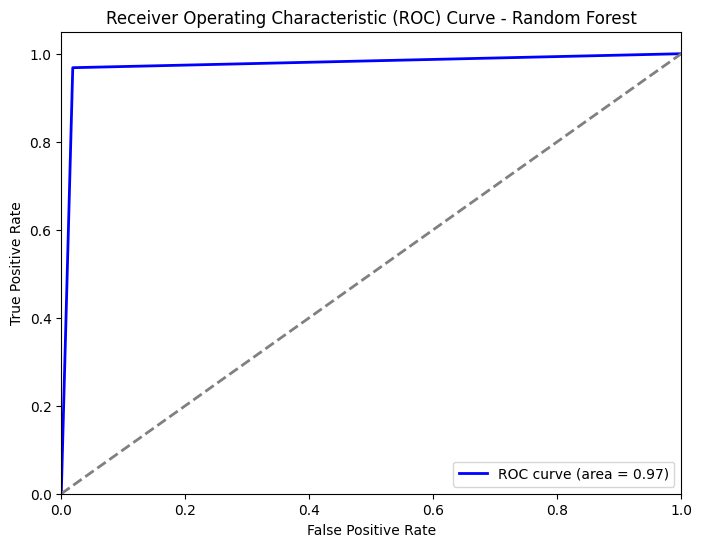

In [ ]:
roc(y_test, y_pred_nn)

La Red Neuronal arroja mejores resultados, así que será el modelo que elegiremos para nuestras predicciones.

In [ ]:
with open('model_nn.pkl', 'wb') as file:
    pickle.dump(model_nn, file)